In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./play_tennis.csv")
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
# Splitting Data
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()
df = df.apply(string_to_int.fit_transform)
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [4]:
# Cleaning and Dividing Data
from sklearn.model_selection import train_test_split
features = ['Outlook','Temprature','Humidity','Wind'] 
X = df[features]
y = df["Play_Tennis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 



In [5]:
# Perform Training Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6


In [6]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# Visualizing Decision tree

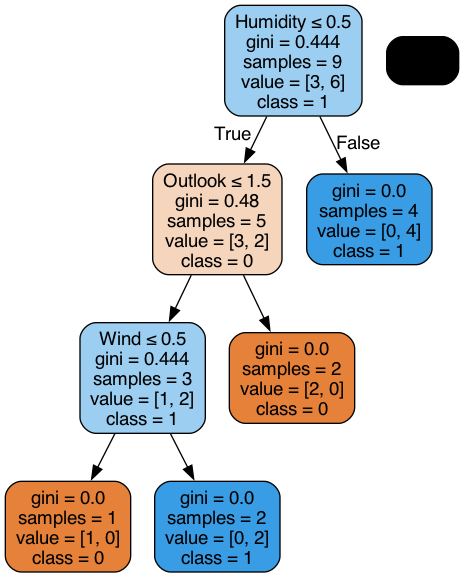

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play_Tennis.png')

from IPython.display import Image
Image(filename='Play_Tennis.png') 